In [1]:
#Bengaluru House Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
h1=pd.read_csv("D:\PGDM\DATA SCIENCE\Kaggle\\Bengaluru_House_Data.csv")
h1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#Feature selection
#We can eliminate areatype,availability,society and balcony for the sake of simplicity

In [5]:
h2=h1.drop(["area_type","availability","society","balcony"],axis=1)
h2.shape

(13320, 5)

In [6]:
h2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
h3=h2.dropna()
h3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
h3.shape

(13246, 5)

In [9]:
h4=h3.copy()

In [10]:
#Grouping location based on their count

In [11]:
h4.location = h4.location.apply(lambda x: x.strip())
locstats=h4.groupby("location")["location"].count().sort_values(ascending=False)
locstats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [12]:
len(locstats)

1293

In [13]:
locstats_lessthanten=(locstats[locstats<=10])
len(locstats_lessthanten)
locstats_lessthanten

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [14]:
h4.location=h4.location.apply(lambda x:"Other" if x in locstats_lessthanten else x)
len(h4.location.unique())

242

In [15]:
h5=h4.copy()
h5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
#Finding out the number of rooms 

In [17]:
h5["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
h5["bhk"]=h5["size"].apply(lambda x: int(x.split()[0]))

In [19]:
h5["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
h5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
#Cleaning total_sqft parameter

In [22]:
h6=h5.copy()

In [23]:
h6.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
#checking the total_sqft is float or not

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
h6[~h6["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [27]:
def conver_totalsqft(x):
    t=x.split("-")
    if len(t)==2:
        return(float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
conver_totalsqft("15-5")

10.0

In [29]:
h6["total_sqft"]=h6["total_sqft"].apply(conver_totalsqft)
h6.total_sqft.head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [30]:
h6.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [31]:
h7=h6.copy()

In [32]:
h7.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [33]:
h7.shape

(13246, 6)

In [34]:
h7=h7.dropna()

In [35]:
h7.shape

(13200, 6)

In [36]:
h8=h7.copy()

In [37]:
h8.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [38]:
#Feature engineering
#Finding price per sqft

In [39]:
h8["price_persqft"]=round(h8["price"]*100000/h8["total_sqft"],2)
h8.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [40]:
h8.isnull().sum()

location         0
size             0
total_sqft       0
bath             0
price            0
bhk              0
price_persqft    0
dtype: int64

In [41]:
h9=h8.copy()

In [42]:
h9["total_sqft"].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [43]:
#We will be eliminating houses having per room sqft area less than 300sqft

In [44]:
h9[h9["total_sqft"]/h9["bhk"]<300].head()


,location,size,total_sqft,bath,price,bhk,price_persqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.00


In [45]:
h9=h9[h9["total_sqft"]/h9["bhk"]>300]
h9.shape


(12274, 7)

In [46]:
h10=h9.copy()

In [47]:
h9["price_persqft"].describe()

count     12274.000000
mean       6211.880238
std        4053.214842
min         267.830000
25%        4200.000000
50%        5263.160000
75%        6825.477500
max      176470.590000
Name: price_persqft, dtype: float64

In [48]:
#removing outliers (min:267 rs and max 176470rs per sqft is not logically feasible)
#so we are apllying empirical rule in price_sqft

In [49]:
def removing_ppfoutliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_persqft)
        st=np.std(subdf.price_persqft)
        reduced_df=subdf[(subdf.price_persqft>(m-st))&(subdf.price_persqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [50]:
h11=removing_ppfoutliers(h10)
h11.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [51]:
h11.shape

(10016, 7)

In [52]:
h11.isnull().sum()

location         0
size             0
total_sqft       0
bath             0
price            0
bhk              0
price_persqft    0
dtype: int64

In [53]:
#h11.sort_index(ascending=False)
#h11.head()

In [54]:
#Plot scatter diagram for price vs sqft

In [55]:
def plot_scatter_chart(df,location):   
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [56]:
h12=h11.copy()

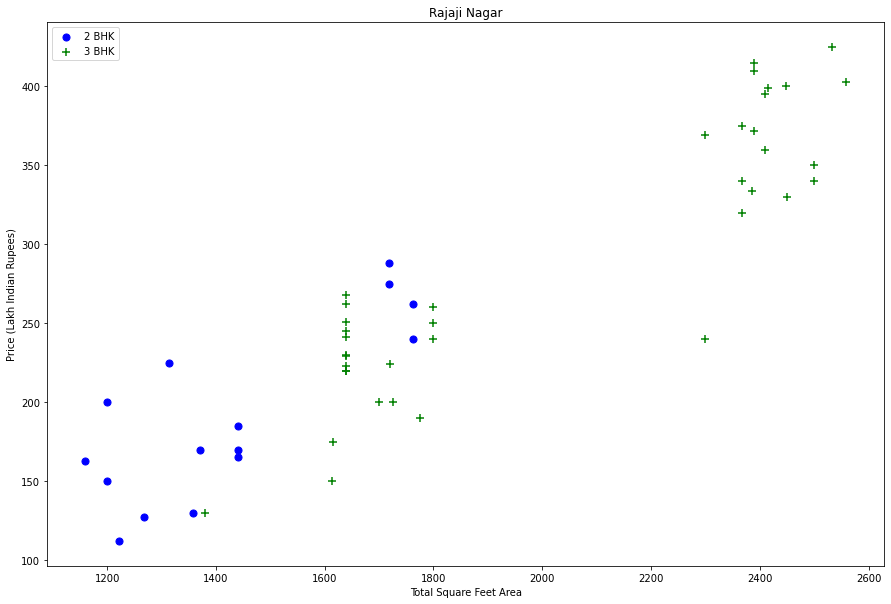

In [57]:
plot_scatter_chart(h12,"Rajaji Nagar")

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_persqft),
                'std': np.std(bhk_df.price_persqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [59]:
h13=remove_bhk_outliers(h12)

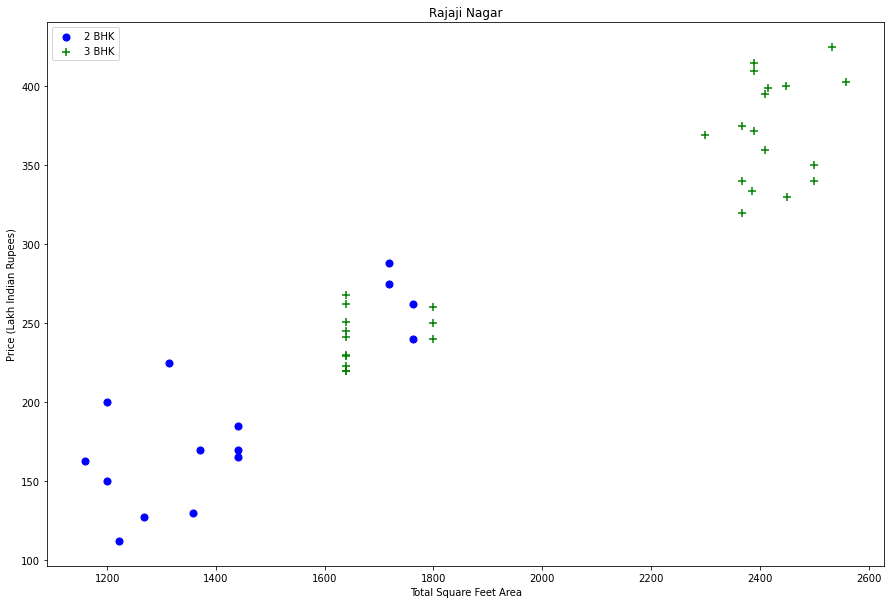

In [60]:
plot_scatter_chart(h13,"Rajaji Nagar")

In [61]:
h13.head()


,location,size,total_sqft,bath,price,bhk,price_persqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [62]:
h14=h13.copy()

In [63]:
h14.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [64]:
h14[h14.bath>h14.bhk]

,location,size,total_sqft,bath,price,bhk,price_persqft
9,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.00,3,10169.49
15,1st Phase JP Nagar,1 BHK,840.0,2.0,50.00,1,5952.38
34,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.00,6,15033.33
42,5th Phase JP Nagar,2 BHK,1150.0,3.0,52.50,2,4565.22
148,7th Phase JP Nagar,2 BHK,1100.0,3.0,60.00,2,5454.55
...,...,...,...,...,...,...,...
9896,Yelahanka,1 BHK,602.0,2.0,30.00,1,4983.39
9901,Yelahanka,2 BHK,1267.0,3.0,78.00,2,6156.27
9913,Yelahanka New Town,1 BHK,500.0,2.0,24.00,1,4800.00
9972,Yeshwanthpur,3 BHK,3027.0,4.0,260.00,3,8589.36


In [65]:
h14[h14.bath>10]

,location,size,total_sqft,bath,price,bhk,price_persqft
5138,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
5776,Other,10 BHK,12000.0,12.0,525.0,10,4375.00
5861,Other,16 BHK,10000.0,16.0,550.0,16,5500.00
6575,Other,11 BHK,6000.0,12.0,150.0,11,2500.00
6900,Other,13 BHK,5425.0,13.0,275.0,13,5069.12


In [66]:
h14.shape

(7164, 7)

In [67]:
h15=h14[~(h14.bath>=h14.bhk+2)]
h15.shape

(7088, 7)

In [68]:
h16=h15.copy()

In [69]:
h16.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [70]:
h16=h16.drop(["size","price_persqft"],axis=1)
h16.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [71]:
h17=pd.concat([h16,(pd.get_dummies(h16.location,drop_first=True))],axis=1)

In [72]:
h18=h17.drop(["location"],axis=1)

In [73]:
h18.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
h18.shape

(7088, 245)

In [75]:
#Lets do regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [77]:
x=h18.drop(["price"],axis=1)
y=h18["price"]

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [79]:
lm=LinearRegression()

In [80]:
lm.fit(x_train,y_train)

LinearRegression()

In [81]:
lm.intercept_

127.61717609762344

In [82]:
print(lm.coef_)

[ 8.24019489e-02  3.27231484e+00 -1.84247774e+00 -1.37917594e+02
 -1.87061213e+02 -3.41231443e+01 -1.69961412e+02 -1.75268180e+02
 -1.33912551e+02 -1.48758311e+02 -1.78743629e+02 -1.76378214e+02
 -1.67968161e+02 -1.78336561e+02 -1.76801045e+02 -1.62091636e+02
 -1.64011465e+02 -1.64073299e+02 -1.75464111e+02 -1.77905192e+02
 -1.65185118e+02 -1.89546414e+02 -1.75166513e+02 -1.65369989e+02
 -1.67314079e+02 -1.38709427e+02 -1.16152482e+02 -1.78338337e+02
 -1.80890830e+02 -1.62941981e+02 -1.47436426e+02 -1.66709221e+02
 -3.91178189e+01 -1.72706120e+02 -1.86911098e+02 -2.34848205e+02
 -1.61243556e+02 -1.52198897e+02 -1.50250588e+02 -1.67526033e+02
 -1.02809065e+02 -1.22665915e+02 -1.86826885e+02 -1.86085965e+02
 -1.88329379e+02 -1.62212049e+02 -6.12271236e+01 -1.82578991e+02
 -1.62088591e+02 -1.51649016e+02 -1.32163504e+02 -1.69768258e+02
 -1.86096425e+02 -1.76933531e+02 -1.91447723e+02 -1.29126670e+02
 -1.55294184e+02 -1.72865883e+02 -1.62619752e+02 -1.03616346e+02
 -1.76086834e+02 -1.79212

In [83]:
lm.score(x_test,y_test)

0.8291889132963248

In [84]:
#Predictions


In [85]:
predictions=lm.predict(x_test)
actual=y_test

In [86]:
MAPE=np.mean(abs((actual-predictions)/actual))*100

In [87]:
print(MAPE)

20.709886126933007


In [88]:
#Lets do 5 fold cross validation.

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85572886, 0.87118822, 0.86029234, 0.8709619 , 0.87063056])

In [90]:
#Lets try different algorithms by using GridsearchCV

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.865760,{'normalize': False}
1,lasso,0.716140,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.825883,"{'criterion': 'mse', 'splitter': 'random'}"


In [96]:
#Exporting the model

In [98]:
import pickle
with open("bengaluru_house_price.pickle","wb") as f:
    pickle.dump(lm,f)